In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score



In [ ]:
import pandas as pd

df = pd.read_csv("/content/predictive_maintenance.csv")
df.head()


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


# EDA

In [ ]:
df.isna().sum()* 100 / len(df)


,0
UDI,0.0
Product ID,0.0
Type,0.0
Air temperature [K],0.0
Process temperature [K],0.0
Rotational speed [rpm],0.0
Torque [Nm],0.0
Tool wear [min],0.0
Target,0.0
Failure Type,0.0


In [ ]:
df['Failure Type'].value_counts()

,count
Failure Type,
No Failure,9652
Heat Dissipation Failure,112
Power Failure,95
Overstrain Failure,78
Tool Wear Failure,45
Random Failures,18


In [ ]:
df['Target'].value_counts()

,count
Target,
0,9661
1,339


In [ ]:
df[df['Target'] == 1]


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
50,51,L47230,L,298.9,309.1,2861,4.6,143,1,Power Failure
69,70,L47249,L,298.9,309.0,1410,65.7,191,1,Power Failure
77,78,L47257,L,298.8,308.9,1455,41.3,208,1,Tool Wear Failure
160,161,L47340,L,298.4,308.2,1282,60.7,216,1,Overstrain Failure
161,162,L47341,L,298.3,308.1,1412,52.3,218,1,Overstrain Failure
...,...,...,...,...,...,...,...,...,...,...
9758,9759,L56938,L,298.6,309.8,2271,16.2,218,1,Tool Wear Failure
9764,9765,L56944,L,298.5,309.5,1294,66.7,12,1,Power Failure
9822,9823,L57002,L,298.5,309.4,1360,60.9,187,1,Overstrain Failure
9830,9831,L57010,L,298.3,309.3,1337,56.1,206,1,Overstrain Failure


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [ ]:
df.describe()


,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


# Label encoder

In [ ]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
le = LabelEncoder()

# Function to apply Label Encoding to object type columns
def encode_object_columns(df):
    label_mapping = {}  # Dictionary to store label mappings
    for column in df.select_dtypes(include=['object']).columns:
        df[column + '_encoded'] = le.fit_transform(df[column])  # Apply label encoding
        label_mapping[column] = dict(zip(le.classes_, le.transform(le.classes_)))  # Store the mapping
    return df, label_mapping

# Apply Label Encoding to all object columns in the DataFrame
df_encoded, label_mapping = encode_object_columns(df)

# View the label mappings
print("Label Mapping for each column:", label_mapping)

# Display the first few rows with the encoded columns
(df_encoded.head())


Label Mapping for each column: {'Product ID': {'H29424': np.int64(0), 'H29425': np.int64(1), 'H29432': np.int64(2), 'H29434': np.int64(3), 'H29441': np.int64(4), 'H29452': np.int64(5), 'H29457': np.int64(6), 'H29462': np.int64(7), 'H29466': np.int64(8), 'H29481': np.int64(9), 'H29494': np.int64(10), 'H29500': np.int64(11), 'H29522': np.int64(12), 'H29525': np.int64(13), 'H29550': np.int64(14), 'H29552': np.int64(15), 'H29557': np.int64(16), 'H29560': np.int64(17), 'H29569': np.int64(18), 'H29571': np.int64(19), 'H29580': np.int64(20), 'H29581': np.int64(21), 'H29595': np.int64(22), 'H29606': np.int64(23), 'H29607': np.int64(24), 'H29610': np.int64(25), 'H29626': np.int64(26), 'H29635': np.int64(27), 'H29680': np.int64(28), 'H29682': np.int64(29), 'H29684': np.int64(30), 'H29691': np.int64(31), 'H29702': np.int64(32), 'H29707': np.int64(33), 'H29712': np.int64(34), 'H29716': np.int64(35), 'H29724': np.int64(36), 'H29734': np.int64(37), 'H29742': np.int64(38), 'H29743': np.int64(39), 'H2

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Product ID_encoded,Type_encoded,Failure Type_encoded
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure,7003,2,1
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure,1003,1,1
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure,1004,1,1
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure,1005,1,1
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure,1006,1,1


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
 10  Product ID_encoded       10000 non-null  int64  
 11  Type_encoded             10000 non-null  int64  
 12  Failure Type_encoded     10000 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 1015.8+ KB


In [ ]:
df_encoded.drop(columns=['Type',"Product ID","Failure Type"], inplace=True)


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Target                   10000 non-null  int64  
 7   Product ID_encoded       10000 non-null  int64  
 8   Type_encoded             10000 non-null  int64  
 9   Failure Type_encoded     10000 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 781.4 KB


# Before data leakage


Training Logistic Regression...


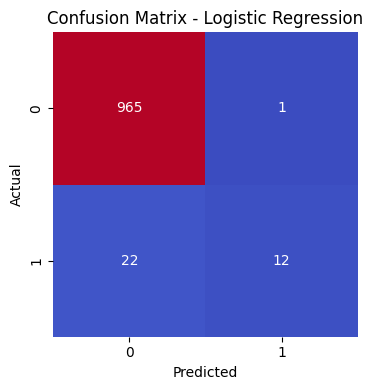


🔍 Classification Report - Logistic Regression
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.92      0.35      0.51        34

    accuracy                           0.98      1000
   macro avg       0.95      0.68      0.75      1000
weighted avg       0.98      0.98      0.97      1000


Training Decision Tree...


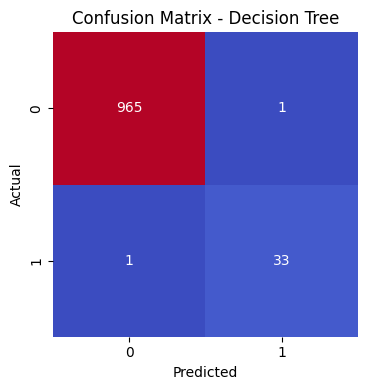


🔍 Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       966
           1       0.97      0.97      0.97        34

    accuracy                           1.00      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       1.00      1.00      1.00      1000


Training Random Forest...


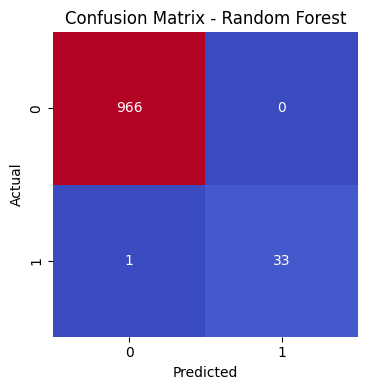


🔍 Classification Report - Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       966
           1       1.00      0.97      0.99        34

    accuracy                           1.00      1000
   macro avg       1.00      0.99      0.99      1000
weighted avg       1.00      1.00      1.00      1000


Training Naive Bayes...


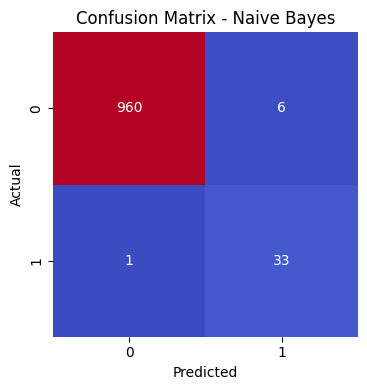


🔍 Classification Report - Naive Bayes
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       966
           1       0.85      0.97      0.90        34

    accuracy                           0.99      1000
   macro avg       0.92      0.98      0.95      1000
weighted avg       0.99      0.99      0.99      1000


Training SVM...


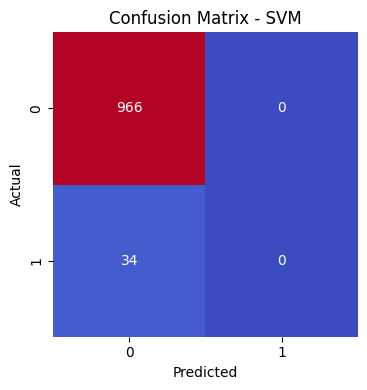


🔍 Classification Report - SVM
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       0.00      0.00      0.00        34

    accuracy                           0.97      1000
   macro avg       0.48      0.50      0.49      1000
weighted avg       0.93      0.97      0.95      1000


Training XGBoost...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/xgboost/c

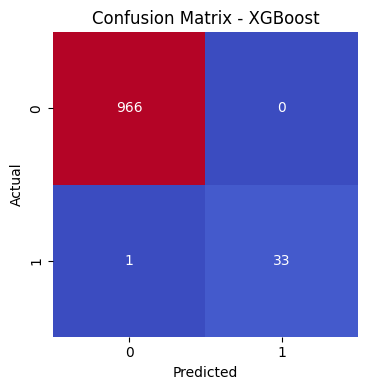


🔍 Classification Report - XGBoost
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       966
           1       1.00      0.97      0.99        34

    accuracy                           1.00      1000
   macro avg       1.00      0.99      0.99      1000
weighted avg       1.00      1.00      1.00      1000



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Define features and target (no scaling or preprocessing)
X = df_encoded.drop(columns=['Target'])
y = df_encoded['Target']

# Clean column names by replacing invalid characters for XGBoost compatibility
X.columns = [str(col).replace('[', '_').replace(']', '_').replace('<', '_').replace('>', '_') for col in X.columns]

# 2. Train/Val/Test Split (80/10/10)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# 3. Define Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    #"KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# 4. Train & Evaluate
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=False, square=True)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

    # Classification Report
    print(f"\n🔍 Classification Report - {name}")
    print(classification_report(y_test, y_pred))


# Data Preprocessing

In [ ]:
import pandas as pd

df = pd.read_csv("/content/predictive_maintenance.csv")
df.head()


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
le = LabelEncoder()

# Fit and transform the 'Type' column
df['Type_encoded'] = le.fit_transform(df['Type'])

# View the mapping of labels to integers
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Mapping:", label_mapping)

# Display the first few rows
print(df[['Type', 'Type_encoded']].head())


Label Mapping: {'H': np.int64(0), 'L': np.int64(1), 'M': np.int64(2)}
  Type  Type_encoded
0    M             2
1    L             1
2    L             1
3    L             1
4    L             1


In [ ]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

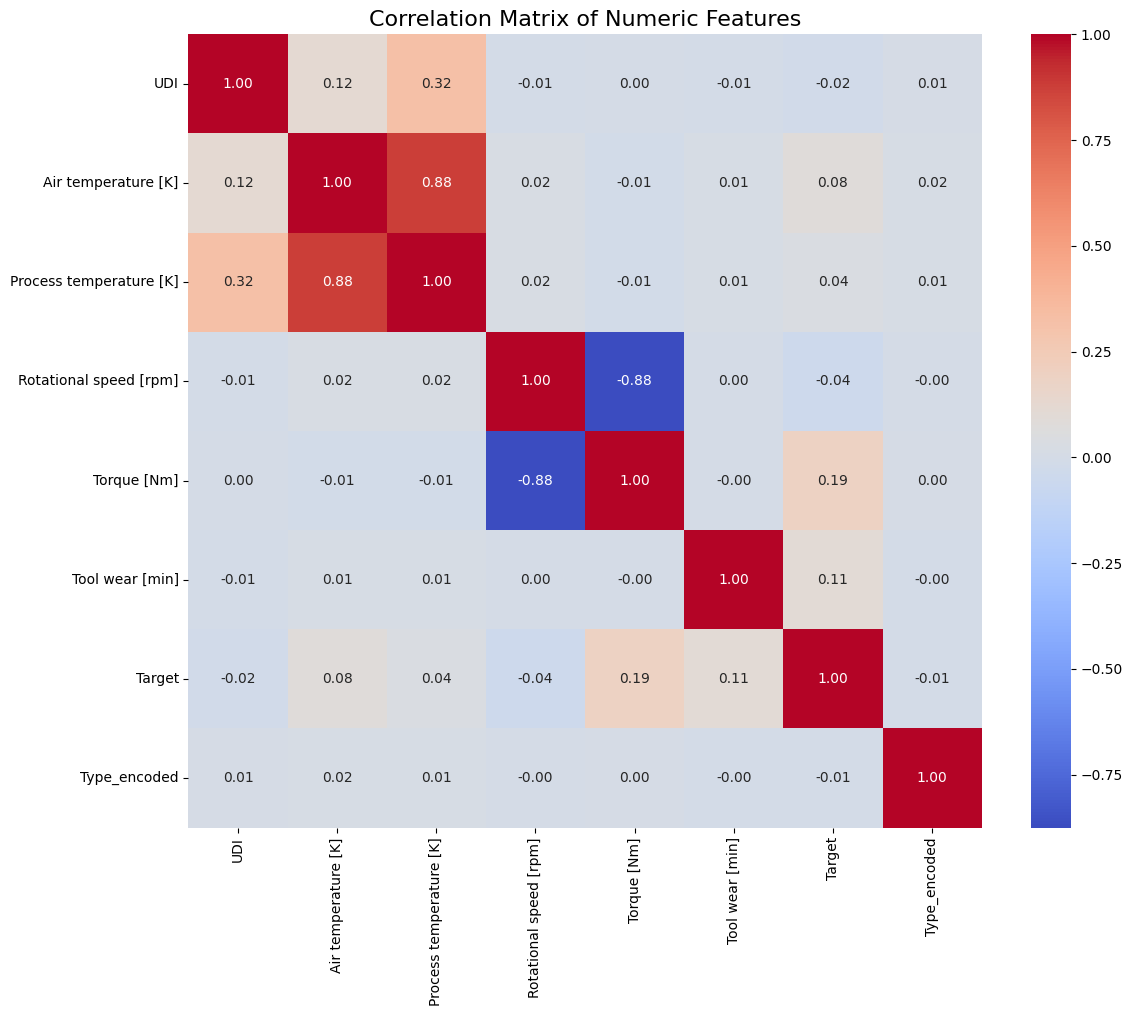

In [ ]:
# Drop non-numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))  # Adjusted to a reasonable size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix of Numeric Features', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
df.drop(columns=['Failure Type'], inplace=True)
# Leakage

In [ ]:
df.drop(columns=['Process temperature [K]', 'Torque [Nm]'], inplace=True)
# for overfiting

In [ ]:
df.drop(columns=["Type","UDI"], inplace=True)


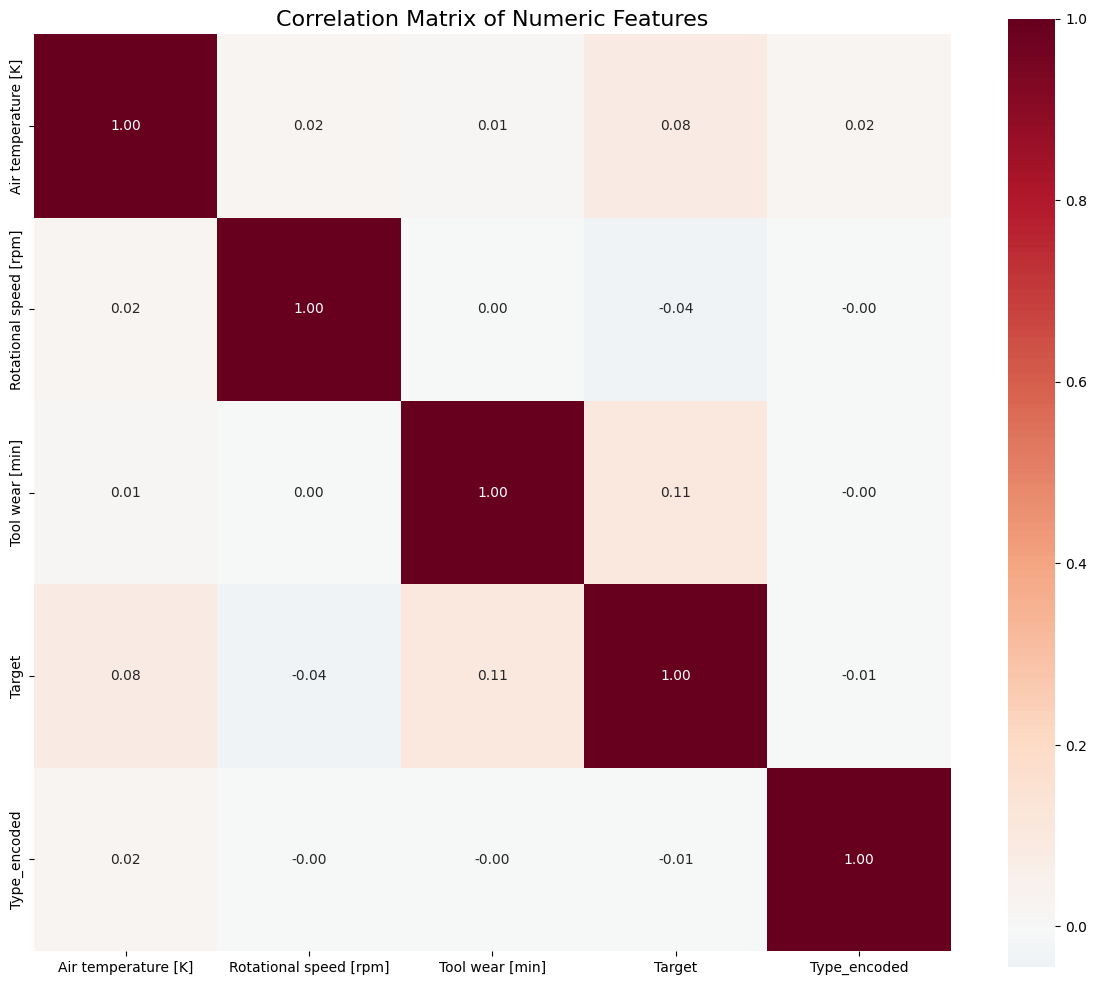

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Drop non-numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='RdBu_r',      # Red-White-Blue reversed: red = +1, white = 0, blue = -1
    center=0,           # Ensures 0 is the neutral midpoint
    fmt='.2f',
    square=True
)
plt.title('Correlation Matrix of Numeric Features', fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
df.columns

Index(['Product ID', 'Air temperature [K]', 'Rotational speed [rpm]',
       'Tool wear [min]', 'Target', 'Type_encoded'],
      dtype='object')

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Product ID              10000 non-null  object 
 1   Air temperature [K]     10000 non-null  float64
 2   Rotational speed [rpm]  10000 non-null  int64  
 3   Tool wear [min]         10000 non-null  int64  
 4   Target                  10000 non-null  int64  
 5   Type_encoded            10000 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [ ]:
df.drop(columns=["Product ID"], inplace=True)
# Leakage

In [ ]:
df["Tool wear [min]"].value_counts()

,count
Tool wear [min],
0,120
2,69
5,63
7,58
59,58
...,...
237,1
239,1
241,1


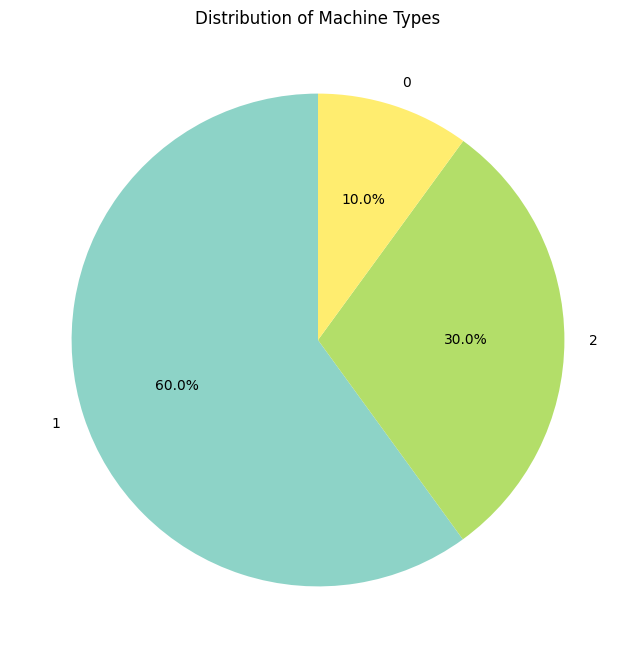

In [ ]:
import matplotlib.pyplot as plt

# Get the value counts for the 'Type' column
type_counts = df["Type_encoded"].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
type_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title('Distribution of Machine Types')
plt.ylabel('')  # Hide the y-axis label for clarity
plt.show()


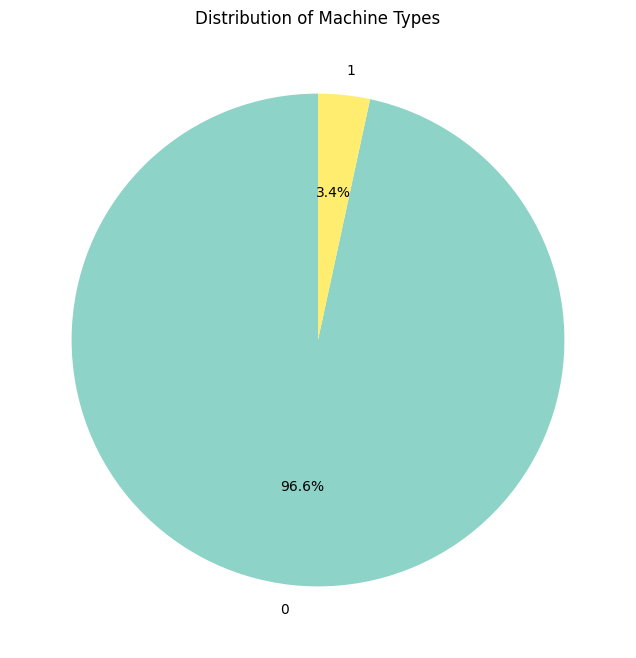

In [ ]:
import matplotlib.pyplot as plt

# Get the value counts for the 'Type' column
type_counts = df["Target"].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
type_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title('Distribution of Machine Types')
plt.ylabel('')  # Hide the y-axis label for clarity
plt.show()


# With outliers


Training Logistic Regression...


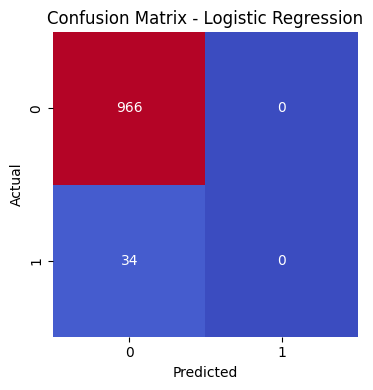


🔍 Classification Report - Logistic Regression
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       0.00      0.00      0.00        34

    accuracy                           0.97      1000
   macro avg       0.48      0.50      0.49      1000
weighted avg       0.93      0.97      0.95      1000


Training Decision Tree...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


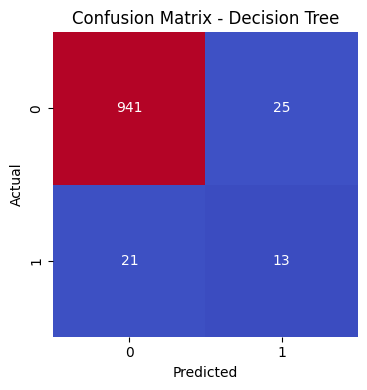


🔍 Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       966
           1       0.34      0.38      0.36        34

    accuracy                           0.95      1000
   macro avg       0.66      0.68      0.67      1000
weighted avg       0.96      0.95      0.96      1000


Training Random Forest...


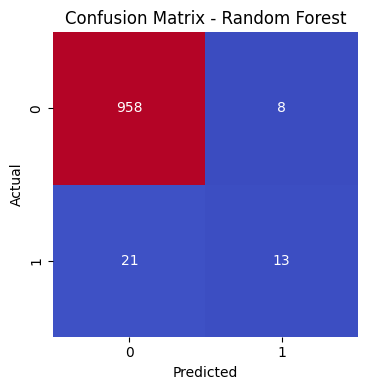


🔍 Classification Report - Random Forest
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       966
           1       0.62      0.38      0.47        34

    accuracy                           0.97      1000
   macro avg       0.80      0.69      0.73      1000
weighted avg       0.97      0.97      0.97      1000


Training Naive Bayes...


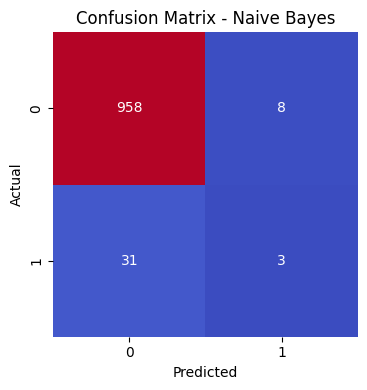


🔍 Classification Report - Naive Bayes
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       966
           1       0.27      0.09      0.13        34

    accuracy                           0.96      1000
   macro avg       0.62      0.54      0.56      1000
weighted avg       0.94      0.96      0.95      1000


Training SVM...


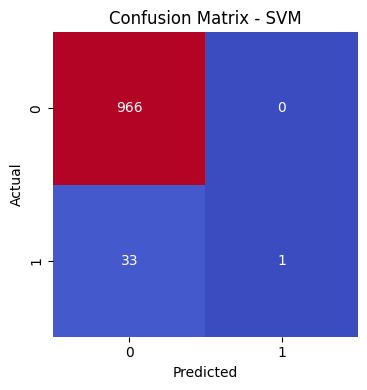


🔍 Classification Report - SVM
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.03      0.06        34

    accuracy                           0.97      1000
   macro avg       0.98      0.51      0.52      1000
weighted avg       0.97      0.97      0.95      1000


Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:57:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


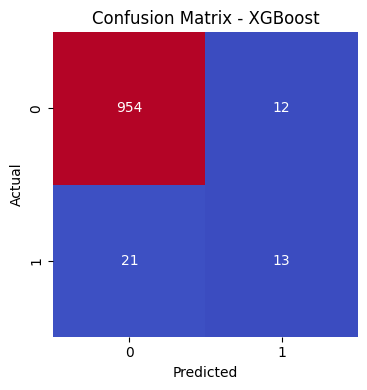


🔍 Classification Report - XGBoost
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       966
           1       0.52      0.38      0.44        34

    accuracy                           0.97      1000
   macro avg       0.75      0.68      0.71      1000
weighted avg       0.96      0.97      0.96      1000



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Define features and target (no scaling or preprocessing)
X = df.drop(columns=['Target'])
y = df['Target']

# Clean column names by replacing invalid characters for XGBoost compatibility
X.columns = [str(col).replace('[', '_').replace(']', '_').replace('<', '_').replace('>', '_') for col in X.columns]

# 2. Train/Val/Test Split (80/10/10)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# 3. Define Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    #"KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# 4. Train & Evaluate
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=False, square=True)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

    # Classification Report
    print(f"\n🔍 Classification Report - {name}")
    print(classification_report(y_test, y_pred))


## Class Weights


=== Training Logistic Regression ===


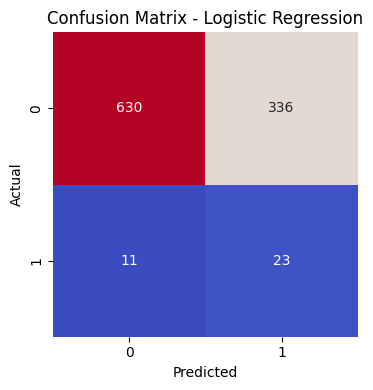


🔍 Classification Report - Logistic Regression
              precision    recall  f1-score   support

           0       0.98      0.65      0.78       966
           1       0.06      0.68      0.12        34

    accuracy                           0.65      1000
   macro avg       0.52      0.66      0.45      1000
weighted avg       0.95      0.65      0.76      1000


=== Training Decision Tree ===


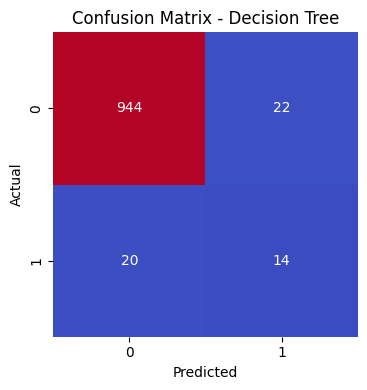


🔍 Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       966
           1       0.39      0.41      0.40        34

    accuracy                           0.96      1000
   macro avg       0.68      0.69      0.69      1000
weighted avg       0.96      0.96      0.96      1000


=== Training Random Forest ===


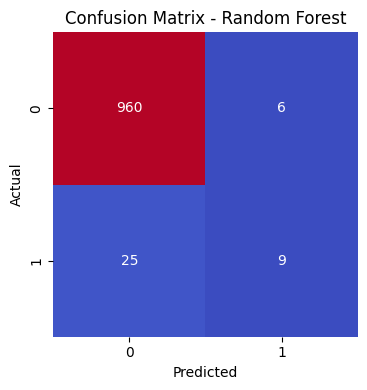


🔍 Classification Report - Random Forest
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       966
           1       0.60      0.26      0.37        34

    accuracy                           0.97      1000
   macro avg       0.79      0.63      0.68      1000
weighted avg       0.96      0.97      0.96      1000


=== Training Naive Bayes ===


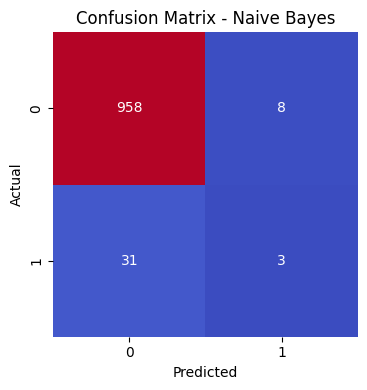


🔍 Classification Report - Naive Bayes
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       966
           1       0.27      0.09      0.13        34

    accuracy                           0.96      1000
   macro avg       0.62      0.54      0.56      1000
weighted avg       0.94      0.96      0.95      1000


=== Training KNN ===


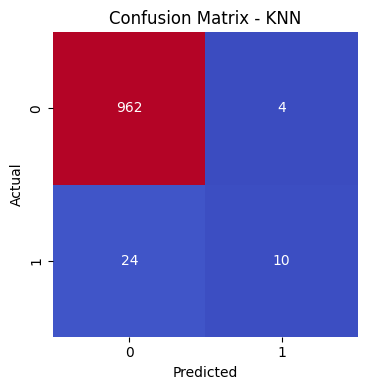


🔍 Classification Report - KNN
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.71      0.29      0.42        34

    accuracy                           0.97      1000
   macro avg       0.84      0.64      0.70      1000
weighted avg       0.97      0.97      0.97      1000


=== Training SVM ===


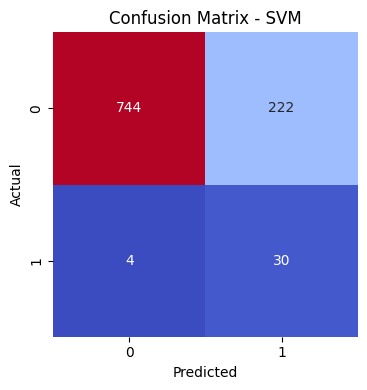


🔍 Classification Report - SVM
              precision    recall  f1-score   support

           0       0.99      0.77      0.87       966
           1       0.12      0.88      0.21        34

    accuracy                           0.77      1000
   macro avg       0.56      0.83      0.54      1000
weighted avg       0.96      0.77      0.85      1000


=== Training XGBoost ===


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:04:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


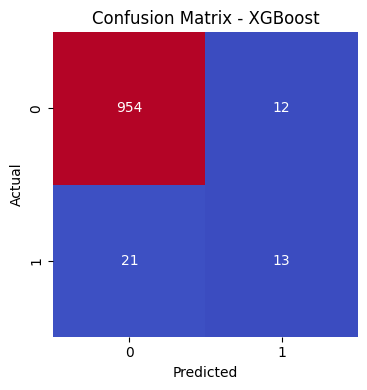


🔍 Classification Report - XGBoost
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       966
           1       0.52      0.38      0.44        34

    accuracy                           0.97      1000
   macro avg       0.75      0.68      0.71      1000
weighted avg       0.96      0.97      0.96      1000



In [ ]:
from sklearn.preprocessing import StandardScaler

# 1. Define features and target
X = df.drop(columns=['Target'])
y = df['Target']

# Clean column names for XGBoost compatibility
X.columns = [str(col).replace('[', '_').replace(']', '_').replace('<', '_').replace('>', '_') for col in X.columns]

# 2. Train/Val/Test Split (80/10/10)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# ⭐ 3. Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# 4. Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(class_weight='balanced'),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# 5. Train & Evaluate
for name, model in models.items():
    print(f"\n=== Training {name} ===")
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=False, square=True)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

    # Classification report
    print(f"\n🔍 Classification Report - {name}")
    print(classification_report(y_test, y_pred))


## Cost-Based Weights


=== Training Logistic Regression with Cost-Based Weights ===


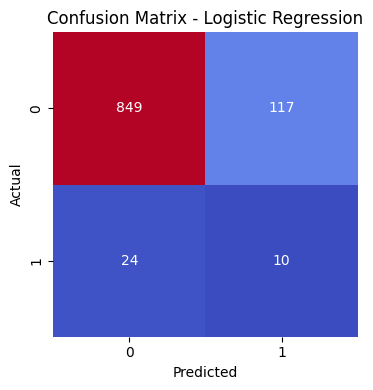


🔍 Classification Report - Logistic Regression
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       966
           1       0.08      0.29      0.12        34

    accuracy                           0.86      1000
   macro avg       0.53      0.59      0.52      1000
weighted avg       0.94      0.86      0.90      1000


=== Training Decision Tree with Cost-Based Weights ===


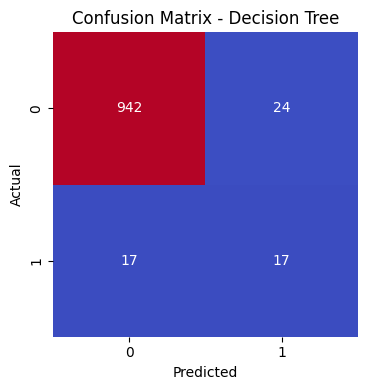


🔍 Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       966
           1       0.41      0.50      0.45        34

    accuracy                           0.96      1000
   macro avg       0.70      0.74      0.72      1000
weighted avg       0.96      0.96      0.96      1000


=== Training Random Forest with Cost-Based Weights ===


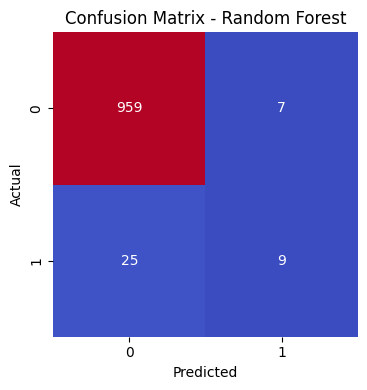


🔍 Classification Report - Random Forest
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       966
           1       0.56      0.26      0.36        34

    accuracy                           0.97      1000
   macro avg       0.77      0.63      0.67      1000
weighted avg       0.96      0.97      0.96      1000


=== Training Naive Bayes with Cost-Based Weights ===


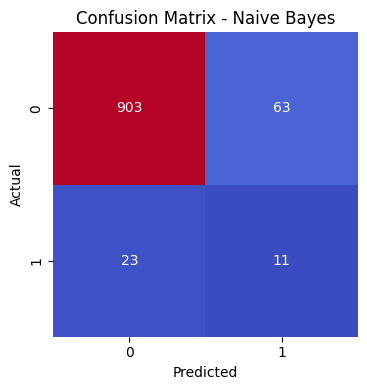


🔍 Classification Report - Naive Bayes
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       966
           1       0.15      0.32      0.20        34

    accuracy                           0.91      1000
   macro avg       0.56      0.63      0.58      1000
weighted avg       0.95      0.91      0.93      1000


=== Training KNN with Cost-Based Weights ===
KNN does not support sample_weight directly. Training without weights.


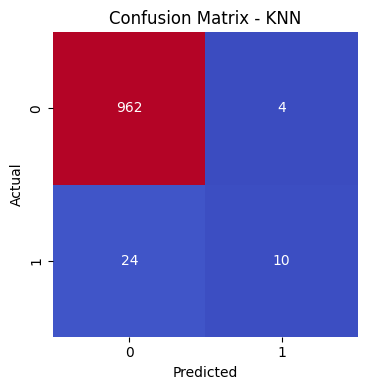


🔍 Classification Report - KNN
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.71      0.29      0.42        34

    accuracy                           0.97      1000
   macro avg       0.84      0.64      0.70      1000
weighted avg       0.97      0.97      0.97      1000


=== Training SVM with Cost-Based Weights ===


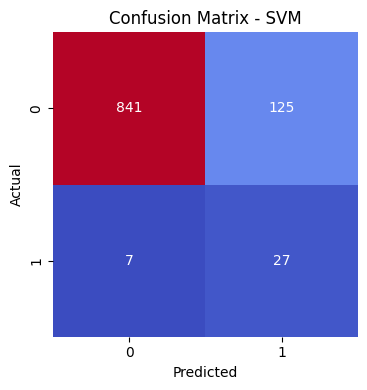


🔍 Classification Report - SVM
              precision    recall  f1-score   support

           0       0.99      0.87      0.93       966
           1       0.18      0.79      0.29        34

    accuracy                           0.87      1000
   macro avg       0.58      0.83      0.61      1000
weighted avg       0.96      0.87      0.91      1000


=== Training XGBoost with Cost-Based Weights ===


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:02:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


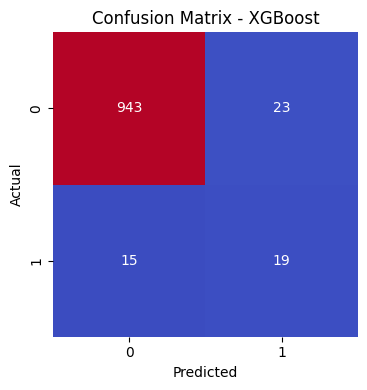


🔍 Classification Report - XGBoost
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       966
           1       0.45      0.56      0.50        34

    accuracy                           0.96      1000
   macro avg       0.72      0.77      0.74      1000
weighted avg       0.97      0.96      0.96      1000



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import xgboost as xgb

# 1. Define features and target (no scaling)
X = df.drop(columns=['Target'])
y = df['Target']
X.columns = [str(col).replace('[', '_').replace(']', '_').replace('<', '_').replace('>', '_') for col in X.columns]

# 2. Train/Val/Test Split (80/10/10)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# 3. Define Sample Weights for Cost-Based Learning
class_weights = {0: 1, 1: 15}  # Adjust cost ratio
sample_weights_train = y_train.map(class_weights).values

# 4. Define Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# 5. Train & Evaluate
for name, model in models.items():
    print(f"\n=== Training {name} with Cost-Based Weights ===")

    # Train with sample_weight if supported
    try:
        model.fit(X_train, y_train, sample_weight=sample_weights_train)
    except TypeError:
        print(f"{name} does not support sample_weight directly. Training without weights.")
        model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    # Confusion Matrix
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=False, square=True)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

    # Classification report
    print(f"\n🔍 Classification Report - {name}")
    print(classification_report(y_test, y_pred))


# Without  outliers

## Outlier code

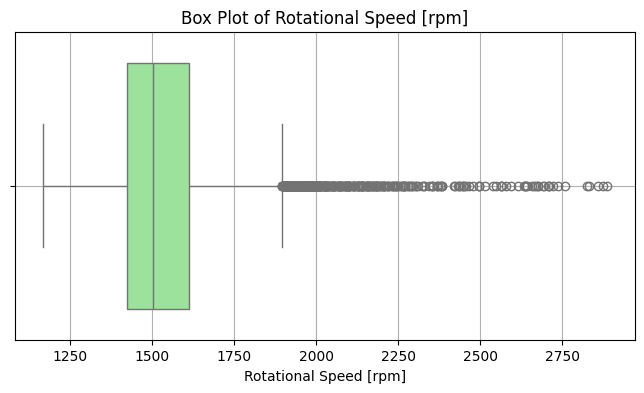

In [ ]:
# Box plot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Rotational speed [rpm]'], color='lightgreen')
plt.title('Box Plot of Rotational Speed [rpm]')
plt.xlabel('Rotational Speed [rpm]')
plt.grid(True)
plt.show()


In [ ]:
# Calculate Q1 and Q3
q1 = df['Rotational speed [rpm]'].quantile(0.25)
q3 = df['Rotational speed [rpm]'].quantile(0.75)
iqr = q3 - q1

# Define outlier bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify outliers
outliers = df[(df['Rotational speed [rpm]'] < lower_bound) | (df['Rotational speed [rpm]'] > upper_bound)]

# Count outliers
num_outliers = len(outliers)

print(f"Number of outliers in 'Rotational speed [rpm]': {num_outliers}")


Number of outliers in 'Rotational speed [rpm]': 418


In [ ]:
len(df)

10000

In [ ]:
num_outliers/len(df) *100
# less than 5 %

4.18

In [ ]:
# Calculate Q1, Q3, and IQR
q1 = df['Rotational speed [rpm]'].quantile(0.25)
q3 = df['Rotational speed [rpm]'].quantile(0.75)
iqr = q3 - q1

# Define outlier bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Drop outliers
df_no_outliers = df[(df['Rotational speed [rpm]'] >= lower_bound) & (df['Rotational speed [rpm]'] <= upper_bound)]

print(f"Original data size: {len(df)}")
print(f"Data size after dropping outliers: {len(df_no_outliers)}")


Original data size: 10000
Data size after dropping outliers: 9582


In [ ]:
df.head()

,Air temperature [K],Rotational speed [rpm],Tool wear [min],Target,Type_encoded
0,298.1,1551,0,0,2
1,298.2,1408,3,0,1
2,298.1,1498,5,0,1
3,298.2,1433,7,0,1
4,298.2,1408,9,0,1


In [ ]:
from sklearn.model_selection import train_test_split

# Features and target
X = df_no_outliers.drop(columns=['Target'])
y = df_no_outliers['Target']

# First split: 80% train, 20% temp (test + val)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
# Now split the remaining 20% equally into validation and test sets (10% each of total)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


In [ ]:
print(f"Train size: {len(X_train)}")
print(f"Validation size: {len(X_val)}")
print(f"Test size: {len(X_test)}")


Train size: 7665
Validation size: 958
Test size: 959


## No unbalanced data


Training Logistic Regression...


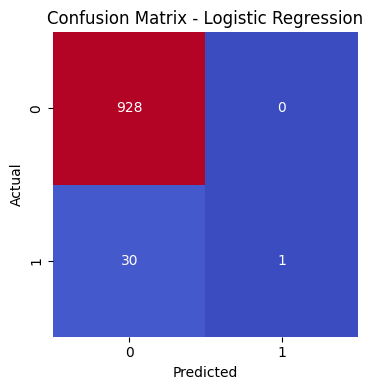


🔍 Classification Report - Logistic Regression
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       928
           1       1.00      0.03      0.06        31

    accuracy                           0.97       959
   macro avg       0.98      0.52      0.52       959
weighted avg       0.97      0.97      0.95       959


Training Decision Tree...


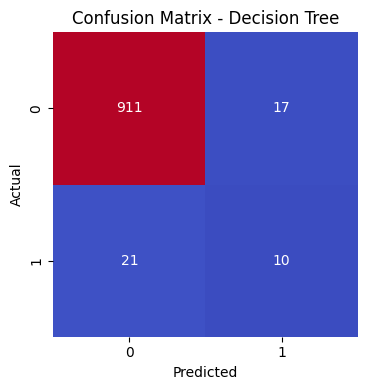


🔍 Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       928
           1       0.37      0.32      0.34        31

    accuracy                           0.96       959
   macro avg       0.67      0.65      0.66       959
weighted avg       0.96      0.96      0.96       959


Training Random Forest...


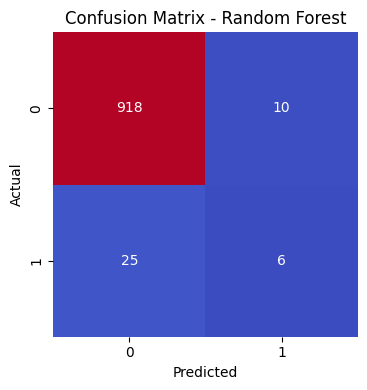


🔍 Classification Report - Random Forest
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       928
           1       0.38      0.19      0.26        31

    accuracy                           0.96       959
   macro avg       0.67      0.59      0.62       959
weighted avg       0.95      0.96      0.96       959


Training Naive Bayes...


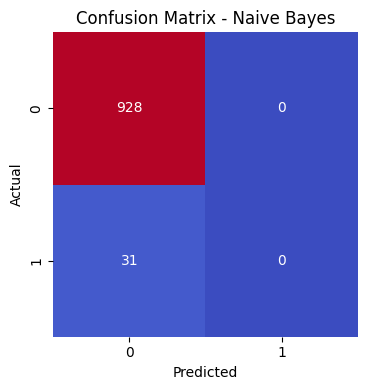


🔍 Classification Report - Naive Bayes
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       928
           1       0.00      0.00      0.00        31

    accuracy                           0.97       959
   macro avg       0.48      0.50      0.49       959
weighted avg       0.94      0.97      0.95       959


Training SVM...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


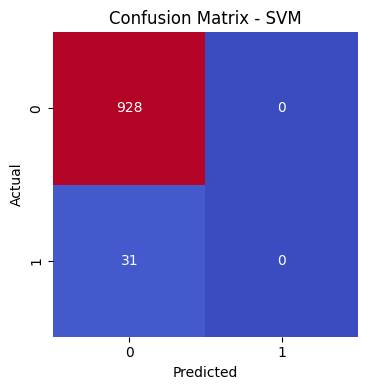


🔍 Classification Report - SVM
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       928
           1       0.00      0.00      0.00        31

    accuracy                           0.97       959
   macro avg       0.48      0.50      0.49       959
weighted avg       0.94      0.97      0.95       959


Training XGBoost...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/xgboost/c

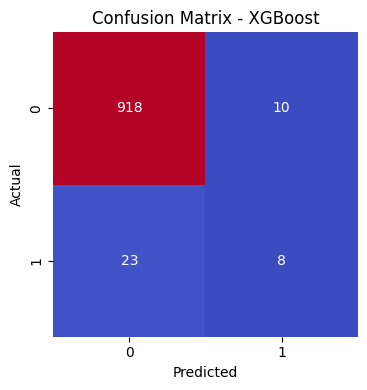


🔍 Classification Report - XGBoost
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       928
           1       0.44      0.26      0.33        31

    accuracy                           0.97       959
   macro avg       0.71      0.62      0.65       959
weighted avg       0.96      0.97      0.96       959



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Define features and target (no scaling or preprocessing)
X = df_no_outliers.drop(columns=['Target'])
y = df_no_outliers['Target']

# Clean column names by replacing invalid characters for XGBoost compatibility
X.columns = [str(col).replace('[', '_').replace(']', '_').replace('<', '_').replace('>', '_') for col in X.columns]

# 2. Train/Val/Test Split (80/10/10)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# 3. Define Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    #"KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# 4. Train & Evaluate
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=False, square=True)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

    # Classification Report
    print(f"\n🔍 Classification Report - {name}")
    print(classification_report(y_test, y_pred))


## Class Weights


=== Training Logistic Regression ===


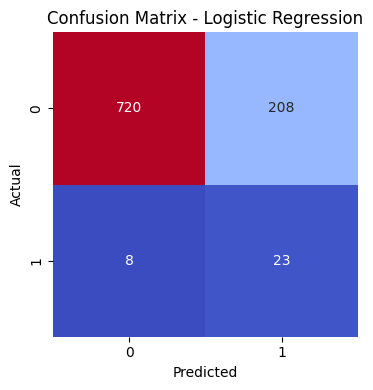


🔍 Classification Report - Logistic Regression
              precision    recall  f1-score   support

           0       0.99      0.78      0.87       928
           1       0.10      0.74      0.18        31

    accuracy                           0.77       959
   macro avg       0.54      0.76      0.52       959
weighted avg       0.96      0.77      0.85       959


=== Training Decision Tree ===


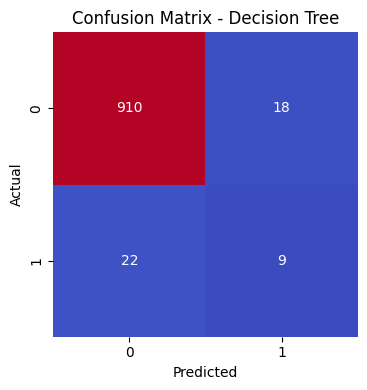


🔍 Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       928
           1       0.33      0.29      0.31        31

    accuracy                           0.96       959
   macro avg       0.65      0.64      0.64       959
weighted avg       0.96      0.96      0.96       959


=== Training Random Forest ===


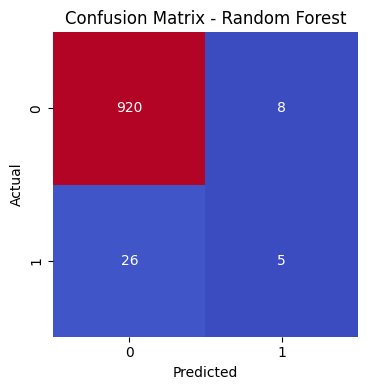


🔍 Classification Report - Random Forest
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       928
           1       0.38      0.16      0.23        31

    accuracy                           0.96       959
   macro avg       0.68      0.58      0.60       959
weighted avg       0.95      0.96      0.96       959


=== Training Naive Bayes ===


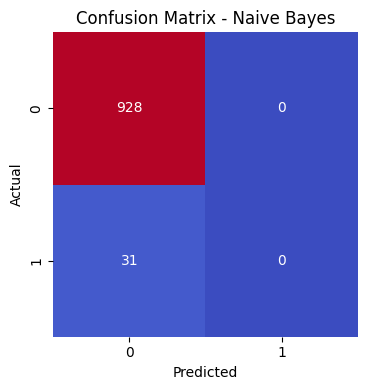


🔍 Classification Report - Naive Bayes
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       928
           1       0.00      0.00      0.00        31

    accuracy                           0.97       959
   macro avg       0.48      0.50      0.49       959
weighted avg       0.94      0.97      0.95       959


=== Training KNN ===


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


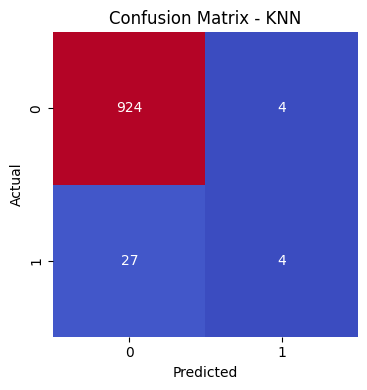


🔍 Classification Report - KNN
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       928
           1       0.50      0.13      0.21        31

    accuracy                           0.97       959
   macro avg       0.74      0.56      0.59       959
weighted avg       0.96      0.97      0.96       959


=== Training SVM ===


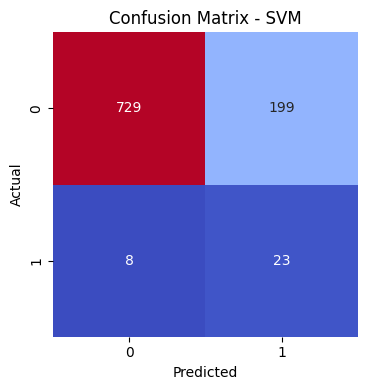


🔍 Classification Report - SVM
              precision    recall  f1-score   support

           0       0.99      0.79      0.88       928
           1       0.10      0.74      0.18        31

    accuracy                           0.78       959
   macro avg       0.55      0.76      0.53       959
weighted avg       0.96      0.78      0.85       959


=== Training XGBoost ===


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:05:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


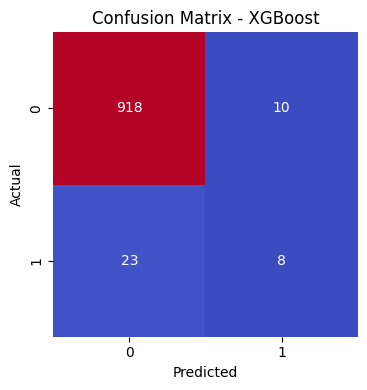


🔍 Classification Report - XGBoost
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       928
           1       0.44      0.26      0.33        31

    accuracy                           0.97       959
   macro avg       0.71      0.62      0.65       959
weighted avg       0.96      0.97      0.96       959



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import xgboost as xgb

# 1. Define features and target
X = df_no_outliers.drop(columns=['Target'])
y = df_no_outliers['Target']

# Clean column names for XGBoost compatibility
X.columns = [str(col).replace('[', '_').replace(']', '_').replace('<', '_').replace('>', '_') for col in X.columns]

# 2. Train/Val/Test Split (80/10/10)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# 3. Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(class_weight='balanced'),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# 4. Train & Evaluate
for name, model in models.items():
    print(f"\n=== Training {name} ===")
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=False, square=True)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

    # Classification report
    print(f"\n🔍 Classification Report - {name}")
    print(classification_report(y_test, y_pred))


## Cost-Based Weights


=== Training Logistic Regression with Cost-Based Weights ===


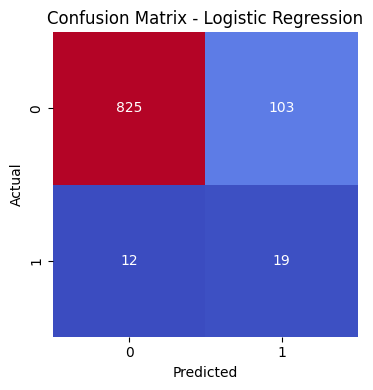


🔍 Classification Report - Logistic Regression
              precision    recall  f1-score   support

           0       0.99      0.89      0.93       928
           1       0.16      0.61      0.25        31

    accuracy                           0.88       959
   macro avg       0.57      0.75      0.59       959
weighted avg       0.96      0.88      0.91       959


=== Training Decision Tree with Cost-Based Weights ===


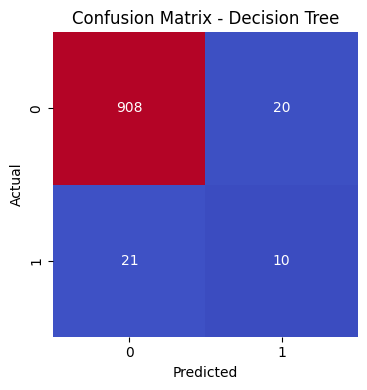


🔍 Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       928
           1       0.33      0.32      0.33        31

    accuracy                           0.96       959
   macro avg       0.66      0.65      0.65       959
weighted avg       0.96      0.96      0.96       959


=== Training Random Forest with Cost-Based Weights ===


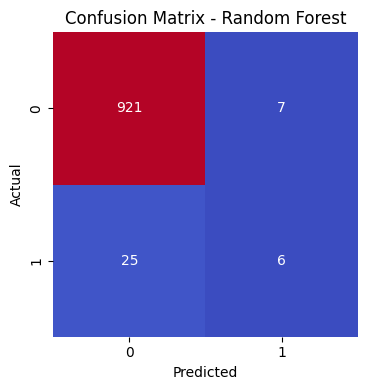


🔍 Classification Report - Random Forest
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       928
           1       0.46      0.19      0.27        31

    accuracy                           0.97       959
   macro avg       0.72      0.59      0.63       959
weighted avg       0.96      0.97      0.96       959


=== Training Naive Bayes with Cost-Based Weights ===


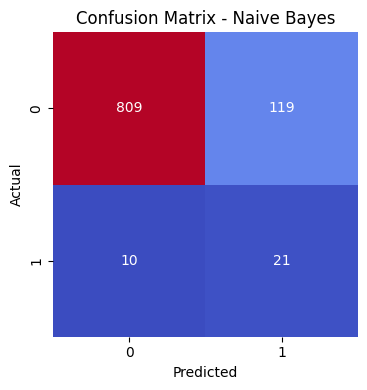


🔍 Classification Report - Naive Bayes
              precision    recall  f1-score   support

           0       0.99      0.87      0.93       928
           1       0.15      0.68      0.25        31

    accuracy                           0.87       959
   macro avg       0.57      0.77      0.59       959
weighted avg       0.96      0.87      0.90       959


=== Training KNN with Cost-Based Weights ===
KNN does not support sample_weight directly. Training without weights.


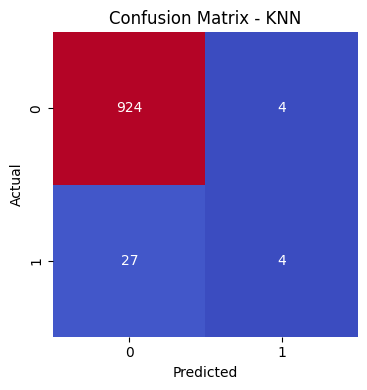


🔍 Classification Report - KNN
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       928
           1       0.50      0.13      0.21        31

    accuracy                           0.97       959
   macro avg       0.74      0.56      0.59       959
weighted avg       0.96      0.97      0.96       959


=== Training SVM with Cost-Based Weights ===


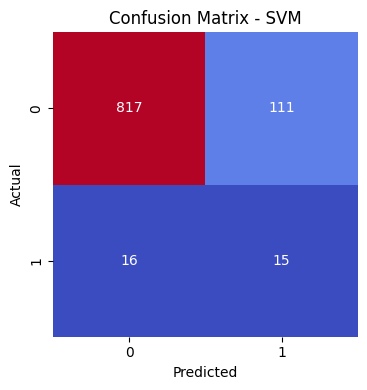


🔍 Classification Report - SVM
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       928
           1       0.12      0.48      0.19        31

    accuracy                           0.87       959
   macro avg       0.55      0.68      0.56       959
weighted avg       0.95      0.87      0.90       959


=== Training XGBoost with Cost-Based Weights ===


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:05:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


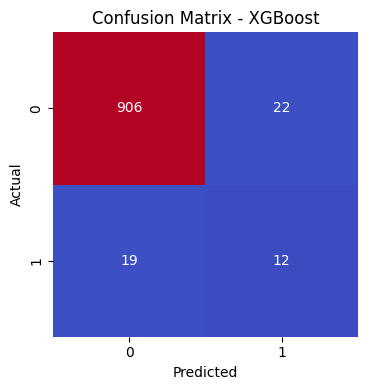


🔍 Classification Report - XGBoost
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       928
           1       0.35      0.39      0.37        31

    accuracy                           0.96       959
   macro avg       0.67      0.68      0.67       959
weighted avg       0.96      0.96      0.96       959



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import xgboost as xgb

# 1. Define features and target (no scaling)
X = df_no_outliers.drop(columns=['Target'])
y = df_no_outliers['Target']
X.columns = [str(col).replace('[', '_').replace(']', '_').replace('<', '_').replace('>', '_') for col in X.columns]

# 2. Train/Val/Test Split (80/10/10)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# 3. Define Sample Weights for Cost-Based Learning
class_weights = {0: 1, 1: 15}  # Adjust cost ratio
sample_weights_train = y_train.map(class_weights).values

# 4. Define Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# 5. Train & Evaluate
for name, model in models.items():
    print(f"\n=== Training {name} with Cost-Based Weights ===")

    # Train with sample_weight if supported
    try:
        model.fit(X_train, y_train, sample_weight=sample_weights_train)
    except TypeError:
        print(f"{name} does not support sample_weight directly. Training without weights.")
        model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    # Confusion Matrix
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=False, square=True)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

    # Classification report
    print(f"\n🔍 Classification Report - {name}")
    print(classification_report(y_test, y_pred))
